# Tumor Classification

The dataset used in this analysis contains information about the properties of tumors from various oncology patients, and class labels for whether or not the tumor was known to be cancerous. The goal of this analysis is to develop a model that can separate classify tumors as cancerous or non-cancerous.

In [220]:
import pandasql as pdsql
import pandas as pd
import matplotlib.pyplot as plt


# Load in Dataset
breast_cancer = pd.read_csv("./datasets/breast-cancer-wisconsin.data", header=None, na_values="?")
breast_cancer.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


Attribute Information:

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

In [221]:
# Rename columns names
breast_cancer = breast_cancer.rename(columns = {
    0 : "patient_id",
    1 : "sample",
    2 : "cell_size",
    3 : "cell_shape",
    4 : "marginal_adhesion",
    5 : "single_epi_cell_size",
    6 : "bare_nuc",
    7 : "bland_chroma",
    8 : "norm_nucl",
    9 : "mitoses",
    10 : "class",
})

breast_cancer.head()

,patient_id,sample,cell_size,cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuc,bland_chroma,norm_nucl,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [222]:
# Let's identify na data and remove those rows
breast_cancer[breast_cancer.isnull().any(axis=1)]
breast_cancer = breast_cancer.dropna()

In [223]:
breast_cancer.describe()

,patient_id,sample,cell_size,cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuc,bland_chroma,norm_nucl,mitoses,class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


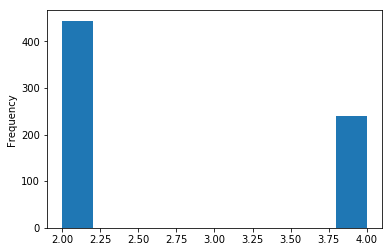

In [224]:
breast_cancer["class"].plot.hist()
plt.show()

As we can see from this histogram, the minority class has a prevalence of approximately 30% (250/800). This means I won't worry too much about class imbalance issues.

In [225]:
breast_cancer.corr()

,patient_id,sample,cell_size,cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuc,bland_chroma,norm_nucl,mitoses,class
patient_id,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
sample,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
cell_size,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
cell_shape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
marginal_adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
single_epi_cell_size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
bare_nuc,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
bland_chroma,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
norm_nucl,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
mitoses,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


It seems as though many of the features are moderately to strongly correlated with each other.

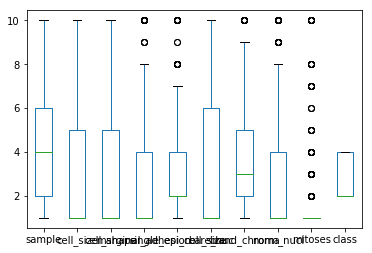

In [226]:
breast_cancer.drop("patient_id", axis=1).plot.box()
plt.show()

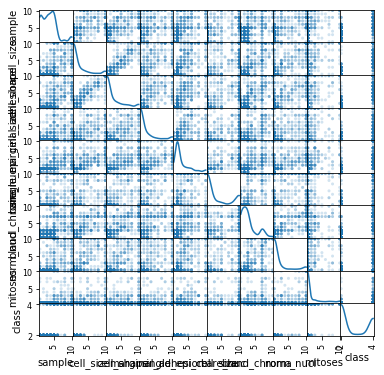

In [227]:
from pandas.plotting import scatter_matrix
scatter_matrix(breast_cancer.drop("patient_id", axis=1), alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

# Data Processing
Let's start by diving the data up into training and test sets

In [228]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# Setup the X and y variables to contain data and classes
X = breast_cancer.drop(["patient_id", "class"], axis=1)
y = breast_cancer["class"]
y[y == 2] = 0
y[y == 4] = 1

# Set aside 20% of data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Use the remaining 80% for training and cross validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.33, random_state=42)



/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [261]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=0)
rf_model.fit(X_train, y_train)

print("Most important features")
for features, importances in sorted(dict(zip(breast_cancer.columns.drop(["patient_id", "class"]), rf_model.feature_importances_)).items(), key=lambda x: x[1], reverse=True):
    print(features, importances)

#rf_y_pred = cross_val_predict(rf_model, X_train, y_train)
rf_cv = cross_val_score(rf_model, X_train, y_train)
print("Accuracy: ", rf_cv)
rf_cv = cross_val_score(rf_model, X_train, y_train, scoring="recall")
print("Recall: ", rf_cv)
confusion_matrix(y_train, rf_model.predict(X_train))



Most important features
cell_size 0.288198942818
cell_shape 0.258950838167
bare_nuc 0.167610740801
bland_chroma 0.120112667382
norm_nucl 0.0538527757331
single_epi_cell_size 0.0525855053748
sample 0.0299994051177
marginal_adhesion 0.0265187082052
mitoses 0.00217041640183
Accuracy:  [ 0.96747967  0.97520661  0.96694215]
Recall:  [ 0.975       0.94871795  0.94871795]


array([[241,   6],
       [  3, 115]])

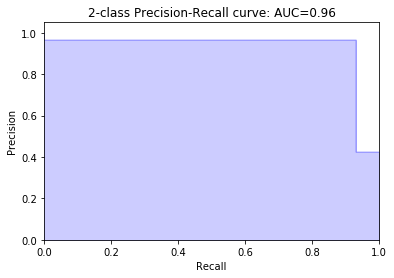

In [231]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = rf_model.predict(X_test)

average_precision = average_precision_score(y_test, y_score)

precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          average_precision))

[(0.0, 0.0, 2), (0.025316455696202531, 0.93103448275862066, 1), (1.0, 1.0, 0)]


/usr/local/lib/python3.6/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/ranking.py:534: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


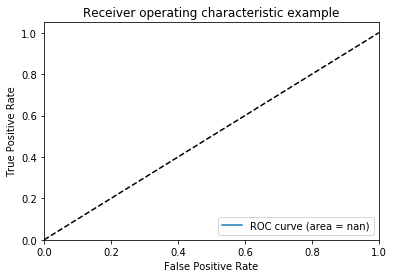

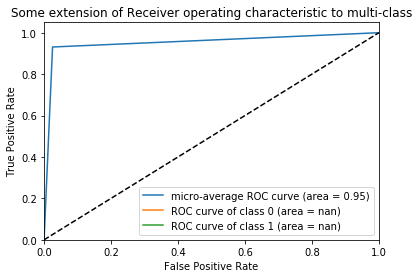

In [259]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
print(list(zip(fpr, tpr, thresholds)))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(rf_model.n_classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test[y_test == i], y_score[y_test == i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[1], tpr[1], label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Results
The random forest classifier has very high accuracy, with few false positives and false negatives. The most influential factors are cell size and shape, followed by bare nucleous and bland chromatin. 

In terms of model selection, we'd want to choose the model that maximizes recall, and minimizes false negative rate (as that would be deadly in this cancer-related scenario, whereas a false positive would only result in mild annoyance due to clinical follow-up procedures)
